# Interactive Plots

The `cytoflow` package is designed for both scripting and interactive use.  As much as I would like the whole world to use data-driven gating and analysis methods, many workflows still require manually specifying gates, and this is most easily done by drawing the gate on a plot.

Fortunately, through the combination of matplotlib and the Jupyter notebook, we can have the best of both worlds: interactive REPL *and* plots that we can point-and-click with.

Clearly, this is best run interactively; but if you're looking at this notebook online, you should still get a flavor of the package's capabilities.

----

First, set up `Jupyter`'s `matplotlib` support, and import the `cytoflow` module.  Note the `%matplotlib notebook` instead of `%matplotlib inline`.

In [1]:
%matplotlib notebook

import cytoflow as flow

Load a few example files, conditioning them on a float variable `Dox`.

In [2]:
tube1 = flow.Tube(file='data/RFP_Well_A3.fcs', conditions = {"Dox" : 10.0})
tube2 = flow.Tube(file='data/CFP_Well_A4.fcs', conditions = {"Dox" : 1.0})

import_op = flow.ImportOp(conditions = {"Dox" : "float"},
                          tubes = [tube1, tube2])

ex = import_op.apply()

All of our analyses are going to be on the `logicle` scale, so lets set it as the default.

In [3]:
flow.set_default_scale('logicle')

Plot the `Y2-A` channel.  We can see there's a bimodal distribution in one of the tubes.

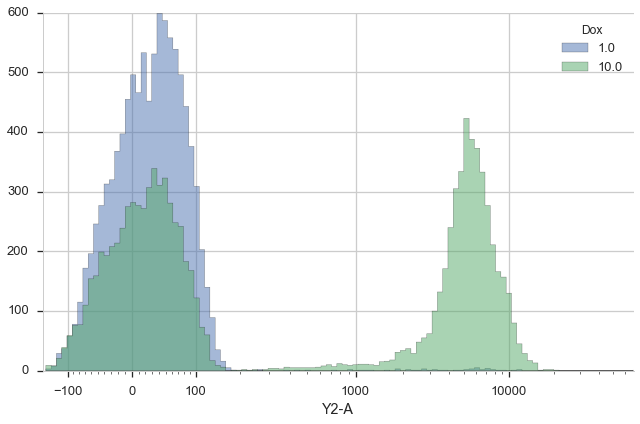

In [4]:
flow.HistogramView(name = "Histogram",
                   channel = "Y2-A",
                   huefacet = "Dox").plot(ex)

Let's use a `ThresholdOp` to split out the top peak.  You can get an interactive plot (the same `HistogramView` as above) by calling `ThresholdOp`'s `default_view()` method.  The view that gets returned is linked back to the `ThresholdOp` that produced it: it shows the proper channel, and when you draw a threshold on it the `ThresholdOp` instance's `threshold` trait gets updated.

One other thing to note: because the `ThresholdOp`'s default view is derived from `HistogramView`, you can use all (well, most!) of the functionality in a regular `HistogramView`.  Here, we'll use the the `huefacet` trait to plot the same multi-colored histogram as above.

As shown below, the steps for using an interactive view are:
* Instantiate the operation
* Call the operation's `default_view()` to get the interactive view.
* Plot the view.
* Set the view's `interactive` trait to `True`.  This step can go before or after calling `plot()`.
* Note that the view now shows a cursor (a vertical blue line) that follows your mouse as you move it around the view.  Select the threshold you want, then click the mouse button to set it.  A fixed blue line appears.

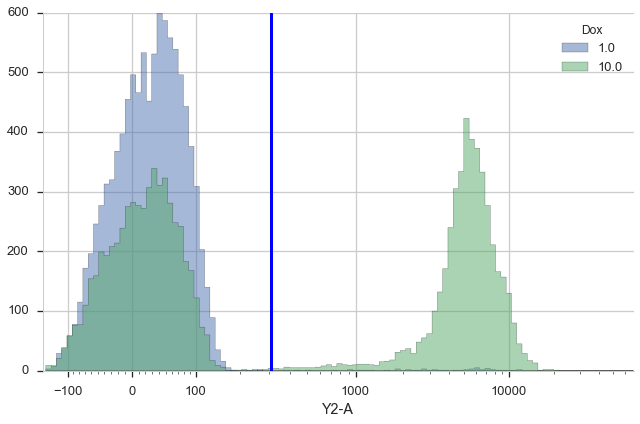

In [5]:
t = flow.ThresholdOp(name = "Threshold",
                     channel = "Y2-A")
tv = t.default_view()
tv.huefacet = "Dox"
tv.scale = "logicle"
tv.interactive = True

tv.plot(ex)

After you've drawn a threshold on the plot, look at the `ThresholdOp` instance's `threshold` trait and see that it matches the threshold you drew.

In [6]:
print t.threshold

308.76541086


You can then apply the newly parameterized operation to the data set.

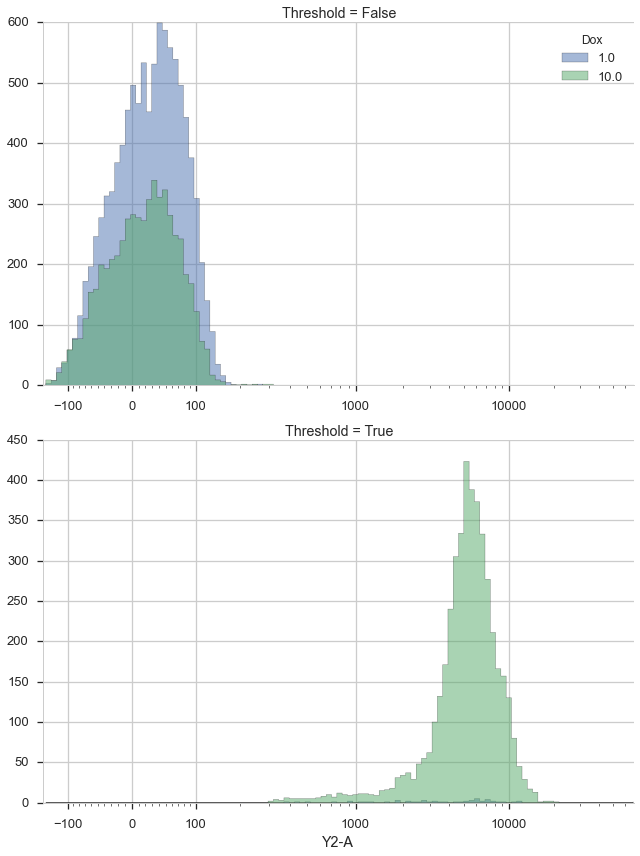

In [7]:
ex2 = t.apply(ex)
flow.HistogramView(name = "Histogram",
                   channel = "Y2-A",
                   huefacet = "Dox",
                   yfacet = "Threshold").plot(ex2)

We can use a similar strategy with the `RangeOp`.  The setup is very much the same; but instead of a single click, drag the cursor to set the range.

Also note that we can compress the invocation by passing the parameters to `default_view()` (as we would to a constructor.)

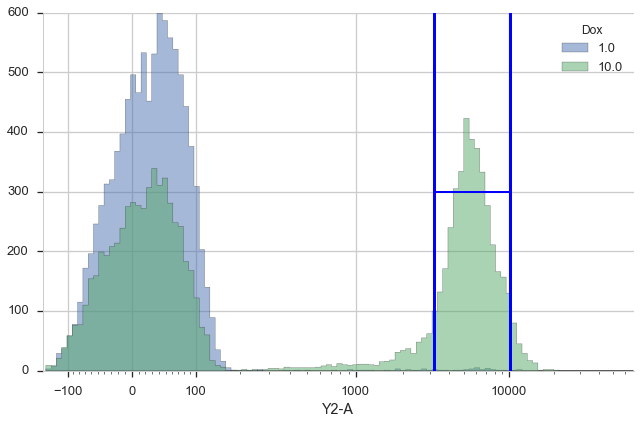

In [8]:
r = flow.RangeOp(name = "Range",
                 channel = "Y2-A")

r.default_view(huefacet = "Dox",
               interactive = True).plot(ex)

In [9]:
print r.low, r.high

3166.77648102 10121.4352589


You can also draw ranges on 2D plots.  Again, drag the cursor to draw a range.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


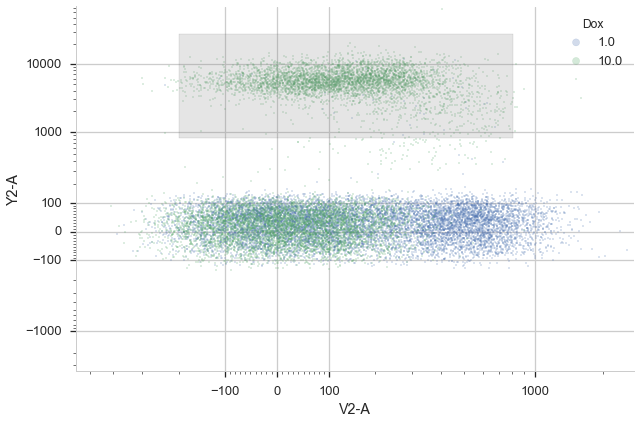

In [10]:
r2d = flow.Range2DOp(name = "Range2D",
                     xchannel = "V2-A",
                     ychannel = "Y2-A")

r2d.default_view(huefacet = "Dox",
                 interactive = True).plot(ex)

In [11]:
print r2d.xlow, r2d.xhigh, r2d.ylow, r2d.yhigh

-200.644319337 804.585324079 832.304982711 28045.8703969


You can specify a polygon this way too.  Unforunately, the JavaScript link between the Jupyter notebook and the Python kernel is a little slow, so the performance here is ... not ideal.  Be patient.

Single click to set vertices; double-click when you're done.

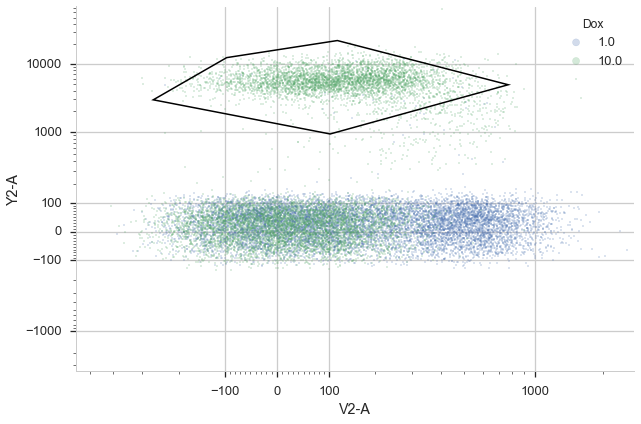

In [12]:
p = flow.PolygonOp(name = "Polygon",
                   xchannel = "V2-A",
                   ychannel = "Y2-A")

pv = p.default_view(huefacet = "Dox",
                    interactive = True)

pv.plot(ex)

In [13]:
print p.vertices

[(-95.86015121225029, 12436.45427720726), (116.29612266387085, 22530.75107463722), (767.6384976398227, 4873.083363849988), (101.64957537525135, 939.3829706004266), (-266.9319096660505, 2914.5929992412416)]


You can also specify a quadrant (or quad) gate.  Move the cursor to where you want it; click to set the gate.

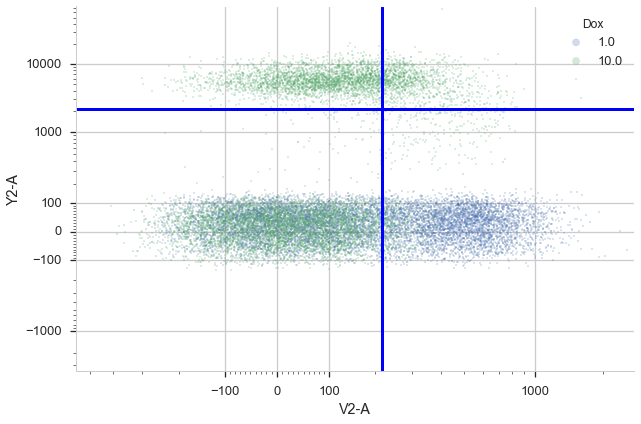

In [14]:
q = flow.QuadOp(name = "Quad",
                xchannel = "V2-A",
                ychannel = "Y2-A")

qv = q.default_view(huefacet = "Dox",
                    interactive = True)

qv.plot(ex)

In [15]:
print q.xthreshold, q.ythreshold

216.740248484 2144.03746946
